<a href="https://colab.research.google.com/github/preethi-raddi/Melanoma-detection-using-deep-learning/blob/main/yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Dec 18 06:42:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 23.4 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4Cin21erOX0RYoRiTOR6")
project = rf.workspace("wayamba").project("melanomadetection-hrynf")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to MelanomaDetection-1 in yolov8:: 100%|██████████| 4114/4114 [00:00<00:00, 6579.99it/s]


In [ ]:
!ls -R /content/MelanomaDetection-1/

/content/MelanomaDetection-1/:
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid

/content/MelanomaDetection-1/test:
images	labels

/content/MelanomaDetection-1/test/images:
melanoma_1010_jpg.rf.0203f2aeb99657b8a10954b8b9782fc3.jpg
melanoma_1011_jpg.rf.35a3b1fb491dc24cf5ee17f7886c01f8.jpg
melanoma_1013_jpg.rf.7bdaf9f3b8e2668caac65949922cb237.jpg
melanoma_101_jpg.rf.65a8efe7184fa3ede8d9a2ff8c1b2eb1.jpg
melanoma_1020_jpg.rf.7425cb57bf083f607a32f404b1505fc5.jpg
melanoma_102_jpg.rf.3d016e4b054637ec52ac838b412a0d23.jpg
melanoma_124_jpg.rf.8dcb840ff2a43d8d3e93ec067a939298.jpg
melanoma_126_jpg.rf.f2962a7214d3e22c7d6e641f3b7975c8.jpg
melanoma_135_jpg.rf.5ac44bf4d21b3f452956fb253c75be64.jpg
melanoma_143_jpg.rf.a4c4cc43a023fc690eb64e56f87467bc.jpg
melanoma_148_jpg.rf.a7982884d2f347e2f75321eab4ff76ed.jpg
melanoma_153_jpg.rf.7d7f0ee39eda2a14494d6eddeca01d90.jpg
melanoma_164_jpg.rf.0bb10d16222703d79bb91f033d528e7f.jpg
melanoma_169_jpg.rf.4efae8148160b2c98bc730948c6c2060.jpg
mel

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model="/content/yolov8.yaml" data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
WARNING ⚠️ no model scale passed. Assuming scale='n'.
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8.yaml, data=/content/MelanomaDetection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

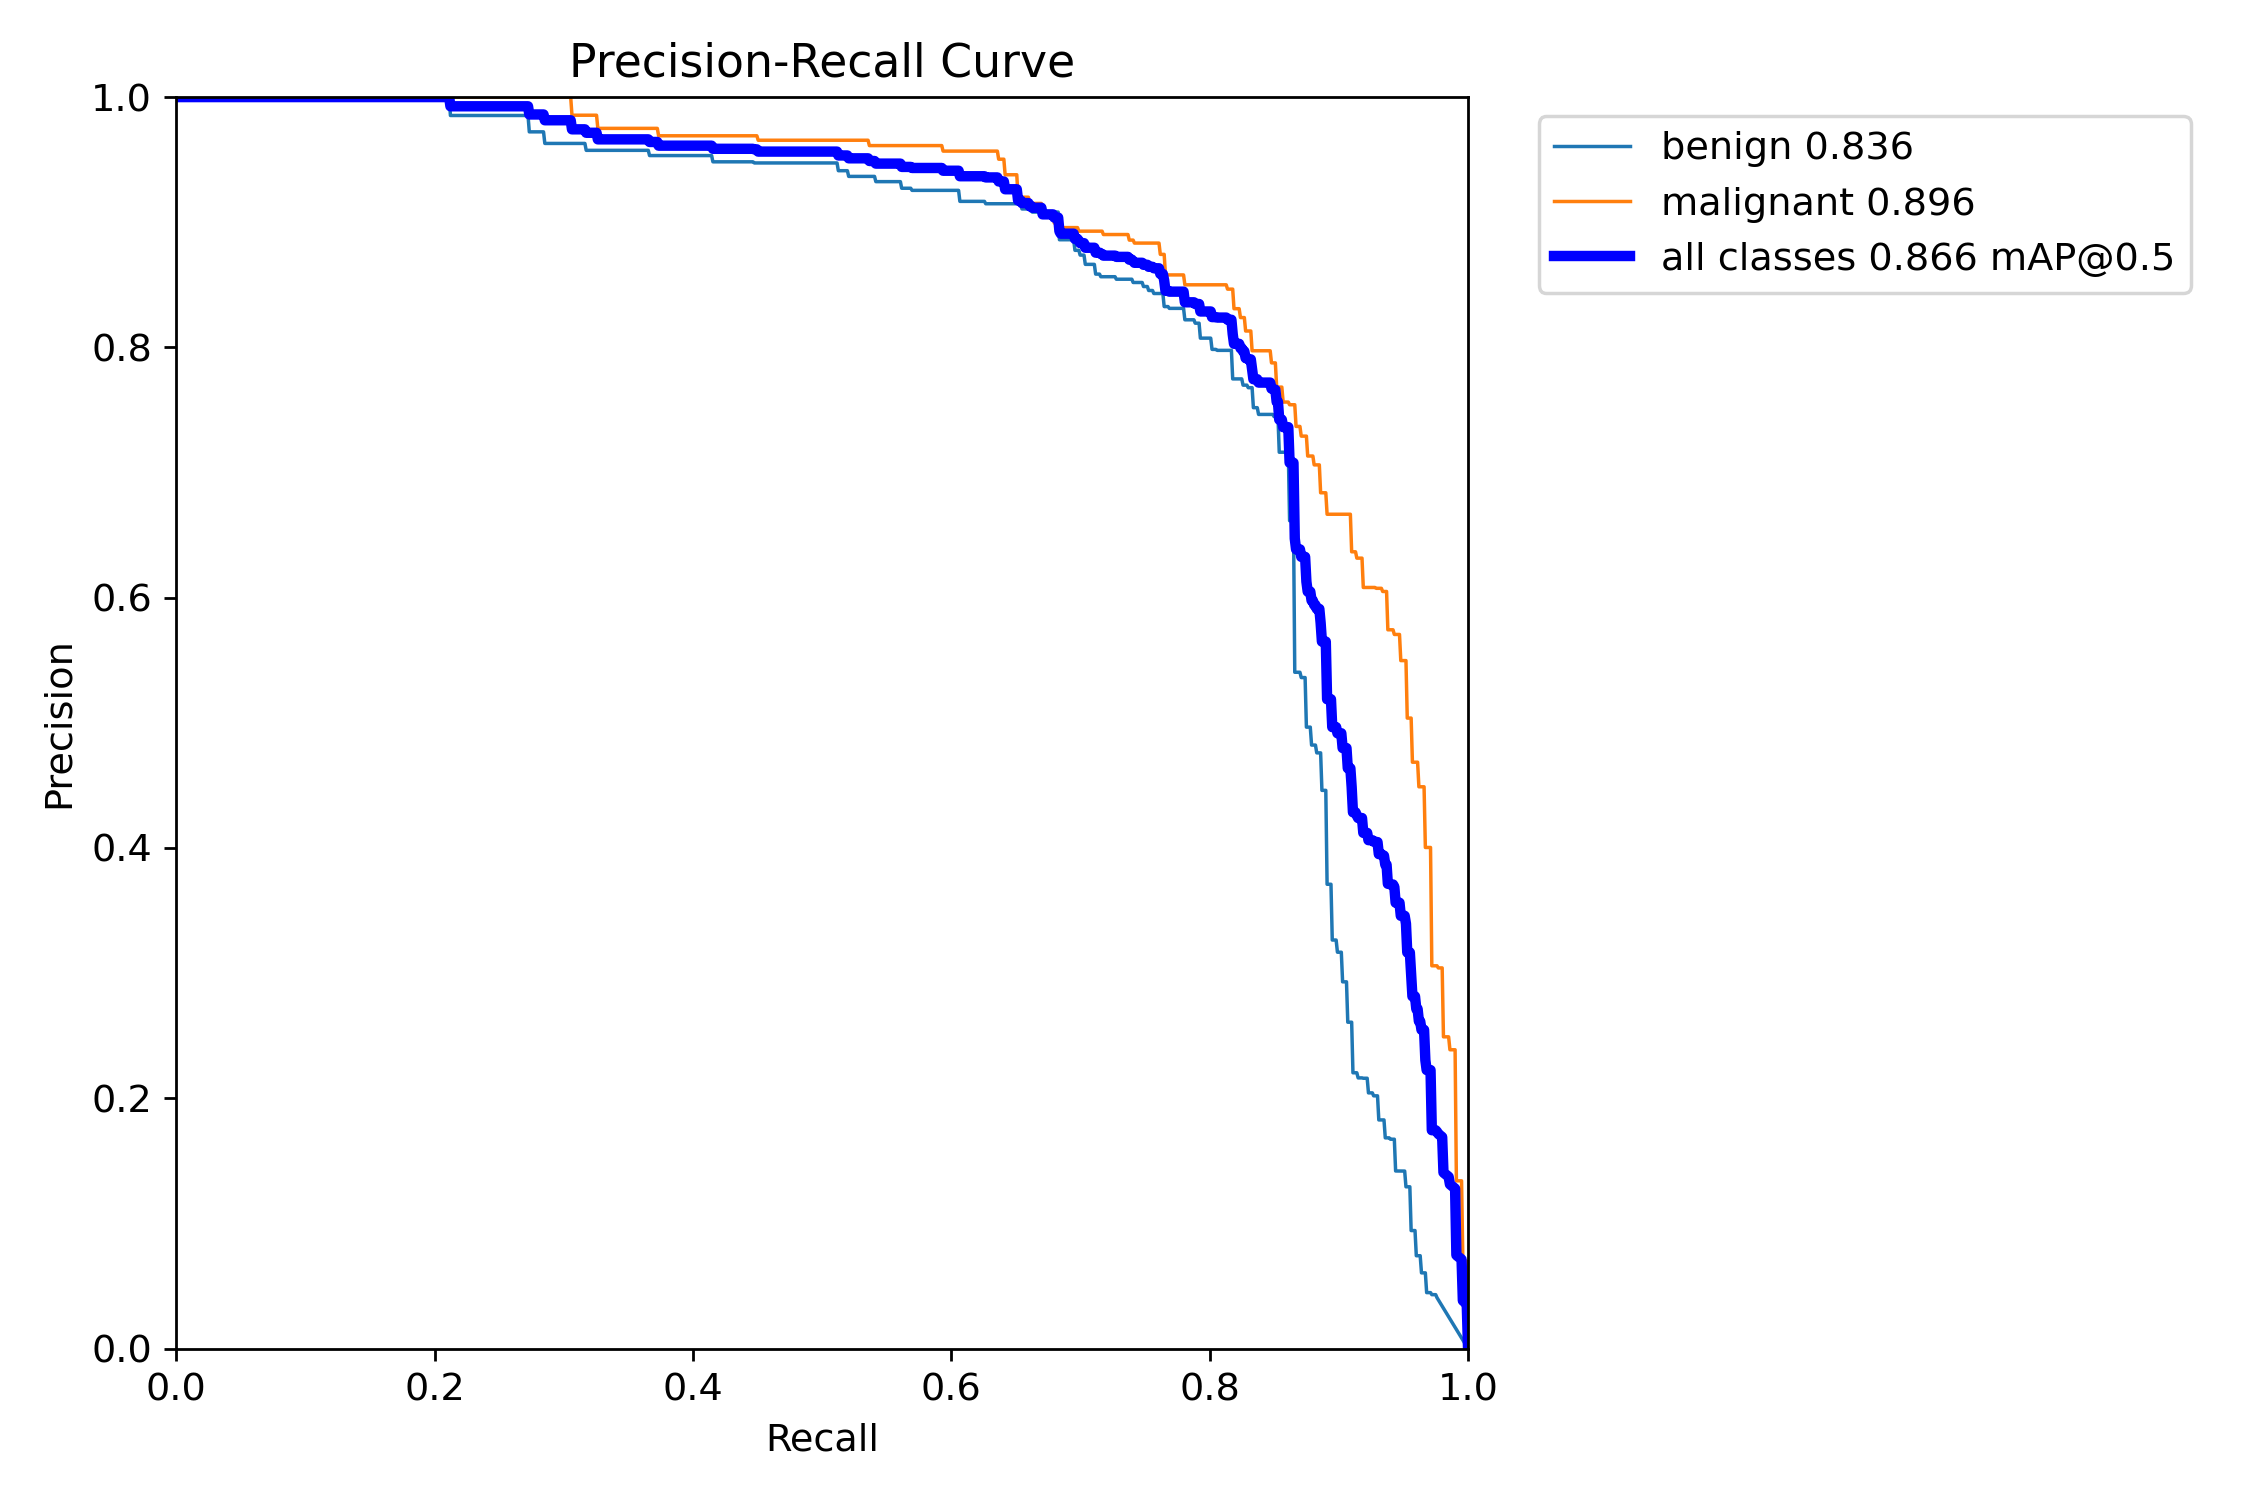

In [ ]:
Image(filename=f'/content/runs/detect/train2/PR_curve.png', width=600)